1) Importe as bibliotecas necessárias

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

2)  Realize a leitura do dataset disponível no SIGAA e apresente os dados lidos.

In [8]:
df = pd.read_csv('vendas.csv')
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [10]:
df.describe(include='all')

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,84548.000000,84548.000000,84548,84548,84548,84548.000000,84548.000000,84548,84548,84548,...,84548.000000,84548.000000,84548.000000,84548,84548,84548.000000,84548.000000,84548,84548,84548
unique,NaN,NaN,254,47,11,NaN,NaN,1,167,67563,...,NaN,NaN,NaN,6062,5691,NaN,NaN,166,10008,364
top,NaN,NaN,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,NaN,NaN,,D4,131-05 40TH ROAD,...,NaN,NaN,NaN,,,NaN,NaN,R4,,2017-06-29 00:00:00
freq,NaN,NaN,3068,18235,38633,NaN,NaN,84548,12663,210,...,NaN,NaN,NaN,26252,27612,NaN,NaN,12989,14561,544
mean,10344.359878,2.998758,NaN,NaN,NaN,4237.218976,376.224015,NaN,NaN,NaN,...,2.025264,0.193559,2.249184,NaN,NaN,1789.322976,1.657485,NaN,NaN,NaN
std,7151.779436,1.289790,NaN,NaN,NaN,3568.263407,658.136814,NaN,NaN,NaN,...,16.721037,8.713183,18.972584,NaN,NaN,537.344993,0.819341,NaN,NaN,NaN
min,4.000000,1.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN
25%,4231.000000,2.000000,NaN,NaN,NaN,1322.750000,22.000000,NaN,NaN,NaN,...,0.000000,0.000000,1.000000,NaN,NaN,1920.000000,1.000000,NaN,NaN,NaN
50%,8942.000000,3.000000,NaN,NaN,NaN,3311.000000,50.000000,NaN,NaN,NaN,...,1.000000,0.000000,1.000000,NaN,NaN,1940.000000,2.000000,NaN,NaN,NaN
75%,15987.250000,4.000000,NaN,NaN,NaN,6281.000000,1001.000000,NaN,NaN,NaN,...,2.000000,0.000000,2.000000,NaN,NaN,1965.000000,2.000000,NaN,NaN,NaN



3) Exclua os seguintes atributos e apresente o dataset resultante:
*   Unnamed: 0
*   NEIGHBORHOOD
*   BUILDING CLASS CATEGORY
*   TAX CLASS AT PRESENT
*   BLOCK
*   LOT
*   EASE-MENT
*   BUILDING CLASS AT PRESENT
*   ADDRESS
*   APARTMENT NUMBER             
*   ZIP CODE
*   GROSS SQUARE FEET
*   BUILDING CLASS AT TIME OF SALE
*   SALE DATE

In [11]:
df.drop(columns=["Unnamed: 0", "NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "TAX CLASS AT PRESENT", "BLOCK", "LOT", "EASE-MENT", "BUILDING CLASS AT PRESENT", "ADDRESS", "APARTMENT NUMBER", "ZIP CODE", "GROSS SQUARE FEET", "BUILDING CLASS AT TIME OF SALE", "SALE DATE"], inplace=True)
df

,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,5,0,5,1633,1900,2,6625000
1,1,28,3,31,4616,1900,2,
2,1,16,1,17,2212,1900,2,
3,1,10,0,10,2272,1913,2,3936272
4,1,6,0,6,2369,1900,2,8000000
...,...,...,...,...,...,...,...,...
84543,5,2,0,2,2400,1998,1,450000
84544,5,2,0,2,2498,1998,1,550000
84545,5,2,0,2,4000,1925,1,460000
84546,5,0,7,7,208033,2001,4,11693337


4) Calcule a apresente a quantidade de registros em branco para cada atributo.

In [12]:
df[(df == " " ) | (df == "")] = np.nan
df.isna().sum()

BOROUGH                          0
RESIDENTIAL UNITS                0
COMMERCIAL UNITS                 0
TOTAL UNITS                      0
LAND SQUARE FEET             26252
YEAR BUILT                       0
TAX CLASS AT TIME OF SALE        0
SALE PRICE                   14561
dtype: int64

In [13]:
df.shape

(84548, 8)

5) Apague todos os registros com valores nulos.

In [14]:
df.dropna(inplace=True)
df.shape

(48799, 8)

6) Apresente a lista com os atributos restantes e os tipos de cada um deles.

In [15]:
df.dtypes

BOROUGH                       int64
RESIDENTIAL UNITS             int64
COMMERCIAL UNITS              int64
TOTAL UNITS                   int64
LAND SQUARE FEET             object
YEAR BUILT                    int64
TAX CLASS AT TIME OF SALE     int64
SALE PRICE                   object
dtype: object

7) O tipo das colunas SALE PRICE e LAND SQUARE FEET está como object porque existiam valores nulos. Altere os tipos destas colunas para float e apresente novamente as colunas com seus tipos.

In [16]:
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].astype(float)
df['SALE PRICE'] = df['SALE PRICE'].astype(float)
df.dtypes

BOROUGH                        int64
RESIDENTIAL UNITS              int64
COMMERCIAL UNITS               int64
TOTAL UNITS                    int64
LAND SQUARE FEET             float64
YEAR BUILT                     int64
TAX CLASS AT TIME OF SALE      int64
SALE PRICE                   float64
dtype: object

Elimine os outliers dos atributos **LAND SQUARE FEET** . Considere outlier os valores que estiverem a mais ou a menos de 3 desvios padrões da média.

8) Apresente os outliers do atributo LAND SQUARE FEET.

In [17]:
lsqrf_mean = df["LAND SQUARE FEET"].mean()
lsqrf_std = df["LAND SQUARE FEET"].std()

limite_inf = lsqrf_mean - 3 * lsqrf_std
limite_sup = lsqrf_mean + 3 * lsqrf_std

print(f'Mean: {lsqrf_mean}')
print(f'Std: {lsqrf_std}')
print(f"Interval: [{limite_inf:.2f}, {limite_sup:.2f}]")

outliers = df[(df["LAND SQUARE FEET"] < limite_inf) | (df["LAND SQUARE FEET"] > limite_sup)]
outliers

Mean: 3629.3951515399904
Std: 40357.84426887891
Interval: [-117444.14, 124702.93]


,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
5004,1,771,0,771,189025.0,1959,2,5020000.0
5005,1,771,0,771,189025.0,1959,2,5020000.0
5006,1,771,0,771,189025.0,1959,2,5020000.0
6332,1,894,8,902,141836.0,1975,2,620000000.0
18805,2,0,0,0,181975.0,0,4,11000000.0
...,...,...,...,...,...,...,...,...
82567,5,0,0,0,328000.0,0,4,4900000.0
82569,5,0,0,0,3014056.0,1971,4,7211750.0
83181,5,0,1,1,2128899.0,1965,4,1.0
83468,5,0,0,0,319200.0,0,1,250000.0


9) Elimine os outliers do atributo LAND SQUARE FEET

In [18]:
df.shape

(48799, 8)

In [19]:
df = df[(df["LAND SQUARE FEET"] >= limite_inf) & (df["LAND SQUARE FEET"] <= limite_sup)]

In [20]:
df.shape

(48732, 8)

10) Calcule a correlação entre as variáveis numéricas e apresente o mapa de calor.

In [21]:
corr = df.corr(method='pearson', numeric_only=True)
corr

,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
BOROUGH,1.000000,-0.099060,-0.009050,-0.076379,0.080759,0.114024,-0.266928,-0.069078
RESIDENTIAL UNITS,-0.099060,1.000000,0.005641,0.705555,0.343078,0.043750,0.025451,0.105545
COMMERCIAL UNITS,-0.009050,0.005641,1.000000,0.712552,0.035828,0.005149,0.047592,0.044920
TOTAL UNITS,-0.076379,0.705555,0.712552,1.000000,0.265389,0.033603,0.055442,0.105819
LAND SQUARE FEET,0.080759,0.343078,0.035828,0.265389,1.000000,0.029034,0.119316,0.192683
YEAR BUILT,0.114024,0.043750,0.005149,0.033603,0.029034,1.000000,-0.227908,0.006342
TAX CLASS AT TIME OF SALE,-0.266928,0.025451,0.047592,0.055442,0.119316,-0.227908,1.000000,0.089648
SALE PRICE,-0.069078,0.105545,0.044920,0.105819,0.192683,0.006342,0.089648,1.000000


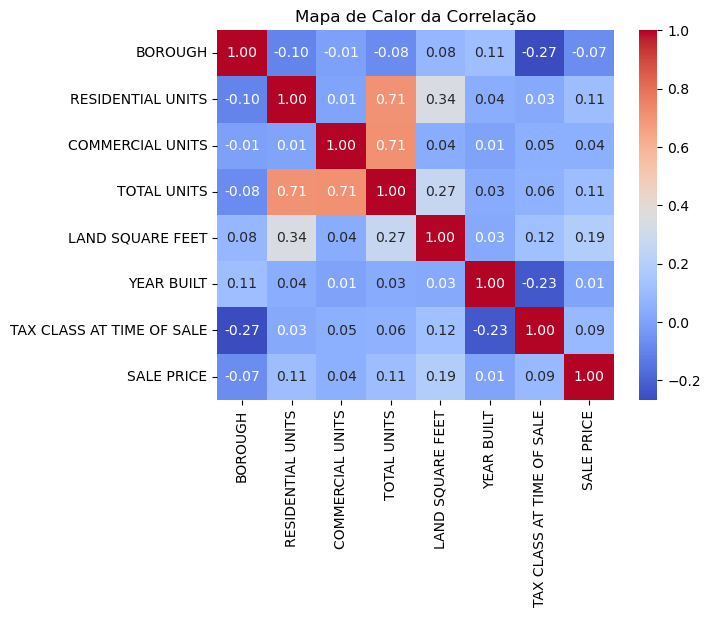

In [22]:
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor da Correlação')
plt.show()

11) Crie um diagrama de dispersão para apresentar a relação entre os atributos LAND SQUARE FEET e SALE PRICE, usando o atributo BOROUGH para atribuir cores diferentes aos pontos. O que pode ser feito para melhorar a interpretação dos dados deste gráfico?

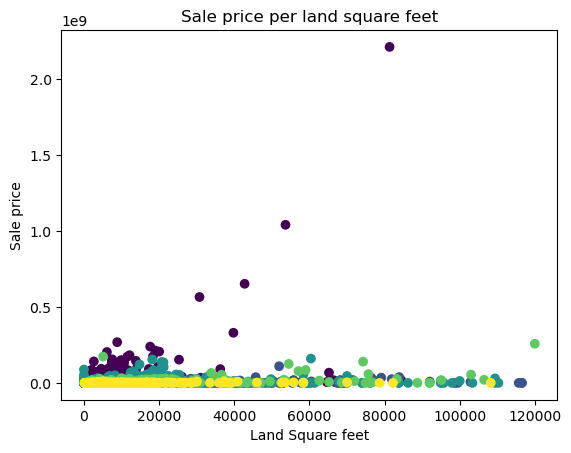

In [23]:
plt.scatter(df["LAND SQUARE FEET"], df["SALE PRICE"], c=df["BOROUGH"])
plt.title('Sale price per land square feet')
plt.xlabel('Land Square feet')
plt.ylabel('Sale price')
plt.show()

Poderiamos remover os outlieners do sale price para melhorar a vizualização e interpretação dos dados

12) Crie um gráfico de colunas para apresentar a média da variável SALE PRICE para cada valor do atributo BOROUGH.

In [24]:
borough_group = df.groupby(["BOROUGH"])
sale_price_group = borough_group["SALE PRICE"].mean()
sale_price_group


BOROUGH
1    1.787300e+07
2    5.467325e+05
3    8.164099e+05
4    9.258670e+05
5    5.237007e+05
Name: SALE PRICE, dtype: float64

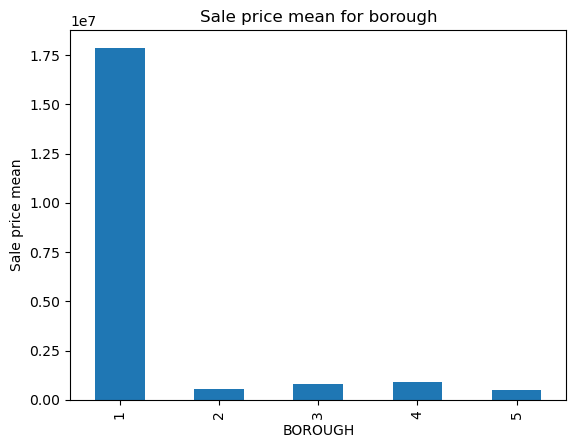

In [25]:
sale_price_group.plot.bar("BOROUGH")
plt.title("Sale price mean for borough")
plt.xlabel("BOROUGH")
plt.ylabel("Sale price mean")
plt.show()

13) Crie um modelo de regressão com todos os atributos. Os dados devem ser divididos da seguinte maneira: 67% para treinamento e 33% para testes. Além disto, use o valor 0 como a semente aleatória deste método.

Apresente os coeficientes da equação e o valor de r2 deste modelo.



In [26]:
X = df.drop(["SALE PRICE"], axis='columns')
y = df["SALE PRICE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, shuffle=True)

modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
w1 = modelo.coef_
w0 =  modelo.intercept_
r2_1 = r2_score(y_test, y_pred)
mse_1 = mean_squared_error(y_test, y_pred)

print(f'Reta {w1[0]:.3f}x +  {w0:.3f}')
print("Coeficiente de determinação: ", r2_1)
print("Erro quadrado médio: ",mse_1)

Reta -744777.459x +  -96056.618
Coeficiente de determinação:  0.03489810725398168
Erro quadrado médio:  321014117006787.6


14) Crie um modelo de regressão com menos atributos (o método para escolha dos atributos fica à escolha do aluno). Os dados devem ser divididos da seguinte maneira: 67% para treinamento e 33% para testes. Além disto, use o valor 0 como a semente aleatória deste método.

Apresente os coeficientes da equação e o valor de r2 deste modelo.


In [27]:
# As colunas YEAR_BUILT e COMMERCIAL_UNITS foram eliminadas por possueirem o coef de correlação mais próximo do zero em relação ao SALE_PRICE
X = df.drop(["SALE PRICE", "YEAR BUILT", "COMMERCIAL UNITS"], axis='columns')
y = df["SALE PRICE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, shuffle=True)

modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
w1 = modelo.coef_
w0 =  modelo.intercept_
r2_2 = r2_score(y_test, y_pred)
mse_2 = mean_squared_error(y_test, y_pred)

print(f'Reta {w1[0]:.3f}x +  {w0:.3f}')
print("Coeficiente de determinação: ", r2_2)
print("Erro quadrado médio: ",mse_2)

Reta -759194.523x +  1242001.244
Coeficiente de determinação:  0.03498335325506097
Erro quadrado médio:  320985762311837.25


15)Compare os resultados e indique qual dos modelos você escolheria. Justifique sua resposta.

In [28]:
print("BEST r²:")
print("Model 1" if r2_1 >= r2_2 else "Model 2")
print("BEST MSE:")
print("Model 1" if mse_1 <= mse_2 else "Model 2")

BEST r²:
Model 2
BEST MSE:
Model 2
